In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/MyDrive/COVID19_1110'

Mounted at /content/gdrive


In [ ]:
# Bibliotecas
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import nibabel as nib
import matplotlib.animation as animation
from matplotlib import rc

In [ ]:
df = pd.read_excel(root_path + '/dataset_registry.xlsx')

classe = df.category.to_numpy()
study_file = df.study_file.to_numpy()
mask_file = df.mask_file.to_numpy()

index_CT0 = np.where(classe=='CT-0')
index_CT1 = np.where(classe=='CT-1')
index_CT2 = np.where(classe=='CT-2')
index_CT3 = np.where(classe=='CT-3')
# CT-4 não foi considerada
#index_CT4 = np.where(classe=='CT-4')

np.random.seed(14)
np.random.shuffle(index_CT0)
np.random.seed(14)
np.random.shuffle(index_CT1)
np.random.seed(14)
np.random.shuffle(index_CT2)
np.random.seed(14)
np.random.shuffle(index_CT3)

# Somente CT1 tem máscara
mask_available = np.where(pd.isnull(mask_file)==False)

In [ ]:
def separar_classes(index_CT):
  n_teste = math.ceil(0.2*np.shape(index_CT)[1])
  n_valid = math.ceil(0.2*(np.shape(index_CT)[1] - n_teste))
  n_treino = np.shape(index_CT)[1] - n_valid - n_teste

  CT_teste = study_file[index_CT[0][:n_teste]]
  CT_valid = study_file[index_CT[0][n_teste:n_teste+n_valid]]
  CT_treino = study_file[index_CT[0][n_teste+n_valid:]]
  return (CT_teste,CT_valid,CT_treino)


def plot_gif(root_path,CT):
  img = nib.load(root_path + CT)
  img.affine
  img_data = img.get_fdata()
  #fig=plt.figure(figsize=(25,25))
  fig = plt.figure()
  #for i in range(img_data.shape[2]):
  #columns = 4
  #rows = 11
  ims = []
  for i in range(img_data.shape[2]):
    a_slice = img_data[:, :, i]
    #fig.add_subplot(rows, columns, i+1)
    im = plt.imshow(a_slice.T, cmap="gray", origin="lower", animated=True)  
    ims.append([im])

  ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                              repeat_delay=1000)
  return ani

def plot_slices(root_path,CT):
  img = nib.load(root_path + CT)
  #img.affine
  img_data = img.get_fdata()
  fig=plt.figure(figsize=(25,25))
  columns = 5
  rows = math.ceil(img_data.shape[2]/columns)
  for i in range(img_data.shape[2]):
    a_slice = img_data[:, :, i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(a_slice.T, cmap="gray", origin="lower")
    plt.title('Corte numero: ' +str(i))
  plt.show()


In [ ]:
CT0_teste,CT0_valid,CT0_treino_sembalanc = separar_classes(index_CT0)
CT1_teste,CT1_valid,CT1_treino_sembalanc = separar_classes(index_CT1)
CT2_teste,CT2_valid,CT2_treino_sembalanc = separar_classes(index_CT2)
CT3_teste,CT3_valid,CT3_treino_sembalanc = separar_classes(index_CT3)

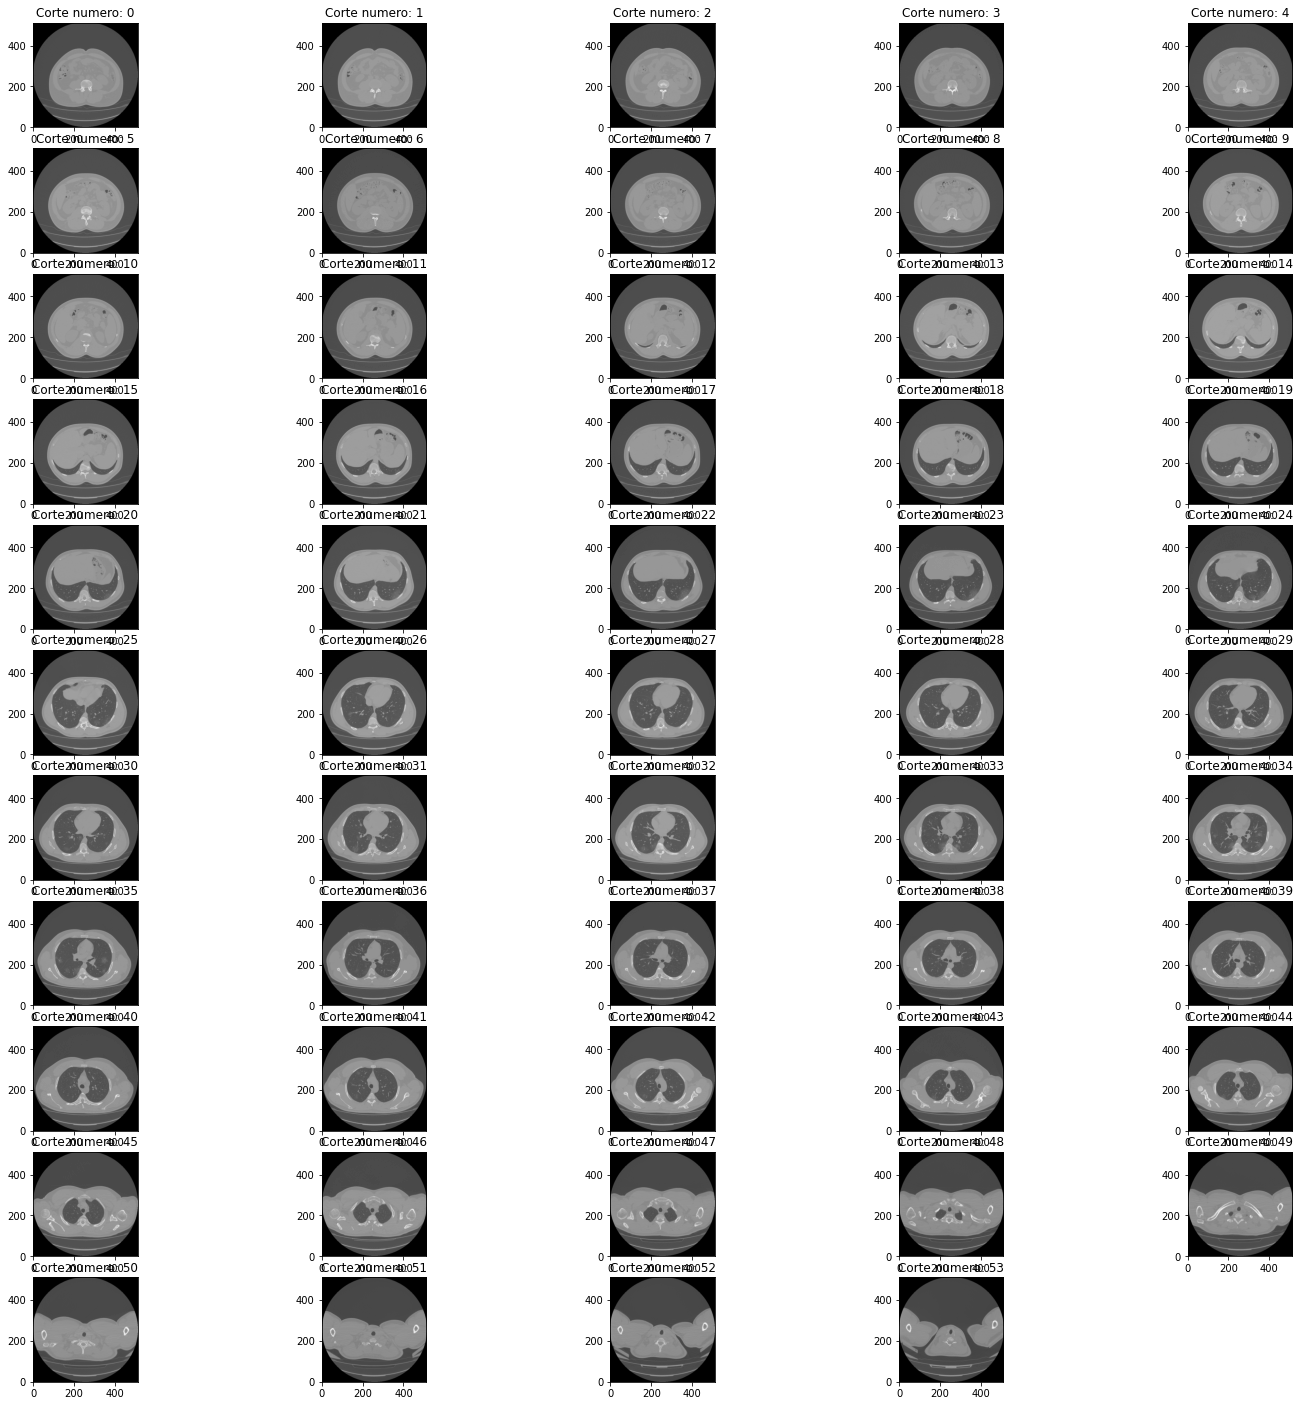

In [ ]:
# Plotar slices da TC
plot_slices(root_path,CT2_teste[0])

In [ ]:
# Vídeo com todos slices
ani = plot_gif(root_path,CT0_teste[0])

rc('animation', html='jshtml')
ani

Output hidden; open in https://colab.research.google.com to view.